In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

np.random.seed(7)

# Data crunch

In [4]:
# load dataset
dataframe = pd.read_csv('data/final.csv', usecols=['logreturns'])
dataset = dataframe.values
dataset = dataset.astype('float32')

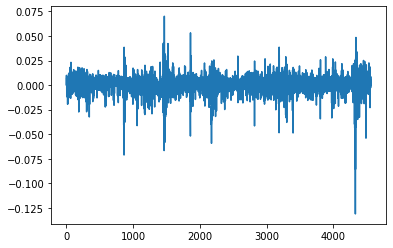

In [5]:
# Visualizing
plt.plot(dataset) #TODO: need to convert to returns

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train =dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

In [8]:
# convert an array of values into a dataset matrix with X=t, Y=t+1
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [sample, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) # figure out what this does
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Fitting model

In [10]:
# train and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) # what does 4 and input_shape do?
model.add(Dense(1)) # what does Dense do?
model.compile(loss='mean_squared_error', optimizer='adam') # adam?
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2) # epochs? verbose?

Epoch 1/10
3649/3649 - 5s - loss: 0.0121
Epoch 2/10
3649/3649 - 3s - loss: 0.0020
Epoch 3/10
3649/3649 - 3s - loss: 0.0020
Epoch 4/10
3649/3649 - 3s - loss: 0.0019
Epoch 5/10
3649/3649 - 3s - loss: 0.0019
Epoch 6/10
3649/3649 - 3s - loss: 0.0019
Epoch 7/10
3649/3649 - 3s - loss: 0.0019
Epoch 8/10
3649/3649 - 3s - loss: 0.0019
Epoch 9/10
3649/3649 - 3s - loss: 0.0019
Epoch 10/10
3649/3649 - 3s - loss: 0.0019


In [11]:
# make predictions
forecast_normalized = model.predict(testX)
# inverting the normalization to original scale
forecast = scaler.inverse_transform(forecast_normalized)
testY = scaler.inverse_transform([testY])

# Evaluating

In [17]:
test_ahead = testY[0][:5]
forecast_ahead = forecast[:,0][:5]

testScore = math.sqrt(mean_squared_error(test_ahead, forecast_ahead))
print(f"RMSE: {round(testScore, 7)}")

RMSE: 0.0036695


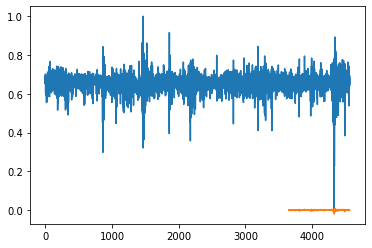

In [13]:
# Plotting predictions
plt.plot(dataset)

# shifting predictions
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainY)+(look_back*2)+1:len(dataset)-1, :] = forecast
plt.plot(testPredictPlot)